In [206]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [201]:
#load dataset
iris = datasets.load_iris()
#create train, test
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
# use standard scaler to standardize data based on mu and sd ! IMPORTANT ONLY TO FIT ON X_train NO LEAKAGE
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#Create models
ppc_model_std = Perceptron(eta0 = 0.3)
ppc_model = Perceptron(eta0 = 0.3)
lg_model_std = LogisticRegression()
lg_model = LogisticRegression()

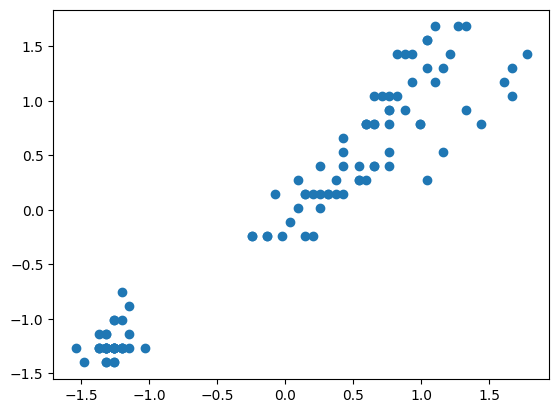

In [202]:
plt.scatter(X_train_std[:, 0], X_train_std[:, 1])
plt.show()

In [203]:
# train models
ppc_model_std.fit(X_train_std, y_train)
ppc_model.fit(X_train, y_train)

lg_model_std.fit(X_train_std, y_train)
lg_model.fit(X_train, y_train)

LogisticRegression()

In [204]:
#predict 95% acc, by using hihger LR
y_pred = ppc_model_std.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.9555555555555556

In [205]:
#alternatively one can do this alle with model.score()
ppc_model.score(X_test, y_test)

0.8888888888888888

In [292]:
def logits(p):
    return np.log(p/(1-p))
logits(0.6224593312018546)

0.5000000000000001

In [293]:
#sigmoid is the inverse of logits
def sigmoid(z):
    return (1.0 / (1+np.exp(-z)))
sigmoid(2)

0.8807970779778823

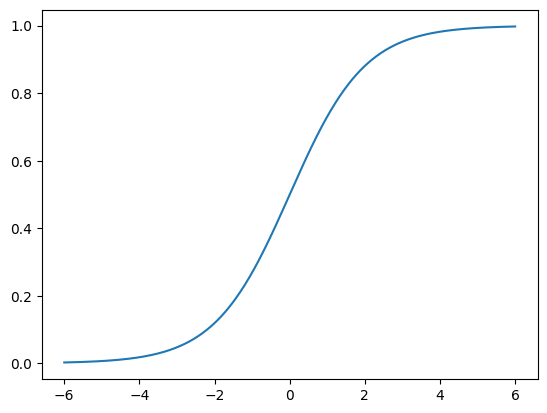

In [288]:
xs = np.linspace(-6, 6, 500)
ys = sigmoid(xs)
plt.plot(xs,ys)

(500,)


C:\Users\emilm\AppData\Local\Temp\ipykernel_2476\3947238963.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(p/(1-p))


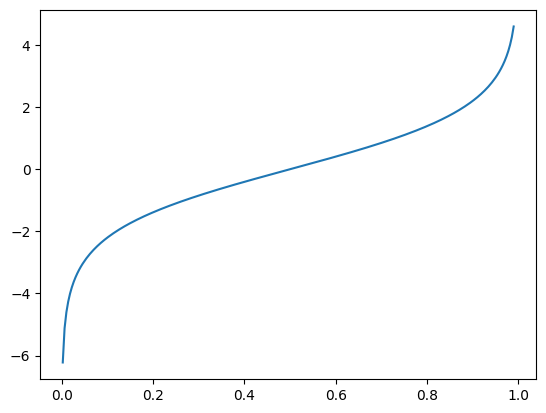

In [232]:
#xs = np.arange(-0.99, 0.99, 0.02)
xs = np.linspace(-0.99, 0.99, 500)
print(xs.shape)
ys = logits(xs)
plt.plot(xs,ys)
# the higher the prob, the higher the value for logit

In [279]:
def f(x):
    return np.log(np.exp(x)) + (np.sinh(x)) - (np.tanh(10*x))
f(0)
dif_f(f, 9)
f(-0.01)

0.07966782795745586

In [266]:
# a function that finds the derivate of a function and a value and returns the slope
def dif_f(f, x, h = 0.001):
    return ((f(x + h) - f(x))  / h)

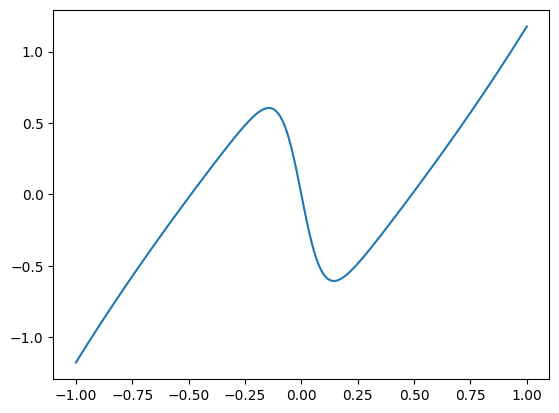

In [259]:
xs = np.linspace(-1, 1, 200)
ys = f(xs)
plt.plot(xs, ys)